
## 9. Boundary Modes


### **Introduction**

In Particle Swarm Optimization, particles move around the search space when updating their positions.
However, during the optimization process, particles often move outside the allowed search boundaries (e.g., ANN weight space like –5 to 5).

Boundary modes define how PSO handles particles that move outside the permitted range.
Different strategies control whether particles:bounce back,get clipped,or are temporarily ignored.

Boundary handling is a crucial part of PSO because it affects:
* convergence stability
* exploration vs. exploitation
* optimisation performance (MAE)

we have carried experiments with Clip,invisible and reflect

### **Experiments**

In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "Experimemts"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/university/BIC project/F21BC-Coursework/src/notebooks/Task 5 - Experiment')

#### **ANN (Fixed)**

In [2]:
# ANN CONFIG
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 8,  "activation": "relu"}, #Hidden Layer 1
    ],
    output_dim=1,
)


#### **1. Boundary Mode - clip**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="random_k",
    k_informants=3,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-5.0, 5.0),
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=16.989514
[PSO] iter 21/200 gbest=9.742034
[PSO] iter 41/200 gbest=8.657893
[PSO] iter 61/200 gbest=8.388544
[PSO] iter 81/200 gbest=7.931207
[PSO] iter 101/200 gbest=7.680068
[PSO] iter 121/200 gbest=7.470820
[PSO] iter 141/200 gbest=7.409392
[PSO] iter 161/200 gbest=7.303192
[PSO] iter 181/200 gbest=7.272997
[PSO] iter 200/200 gbest=7.224204
   gBest=7.2242 | Train MAE=7.2242 | Test MAE=7.5664

 Run 2/10
[PSO] iter 1/200 gbest=15.881282
[PSO] iter 21/200 gbest=9.092718
[PSO] iter 41/200 gbest=8.424209
[PSO] iter 61/200 gbest=7.959245
[PSO] iter 81/200 gbest=7.813776
[PSO] iter 101/200 gbest=7.728684
[PSO] iter 121/200 gbest=7.603354
[PSO] iter 141/200 gbest=7.584239
[PSO] iter 161/200 gbest=7.486708
[PSO] iter 181/200 gbest=7.322984
[PSO] iter 200/200 gbest=7.294128
   gBest=7.2941 | Train MAE=7.2941 | Test MAE=7.6595

 Run 3/10
[PSO] iter 1/200 gbest=14.119222
[PSO] iter 21/200 gbest=9.379965
[PSO] 

C:\university\BIC project\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


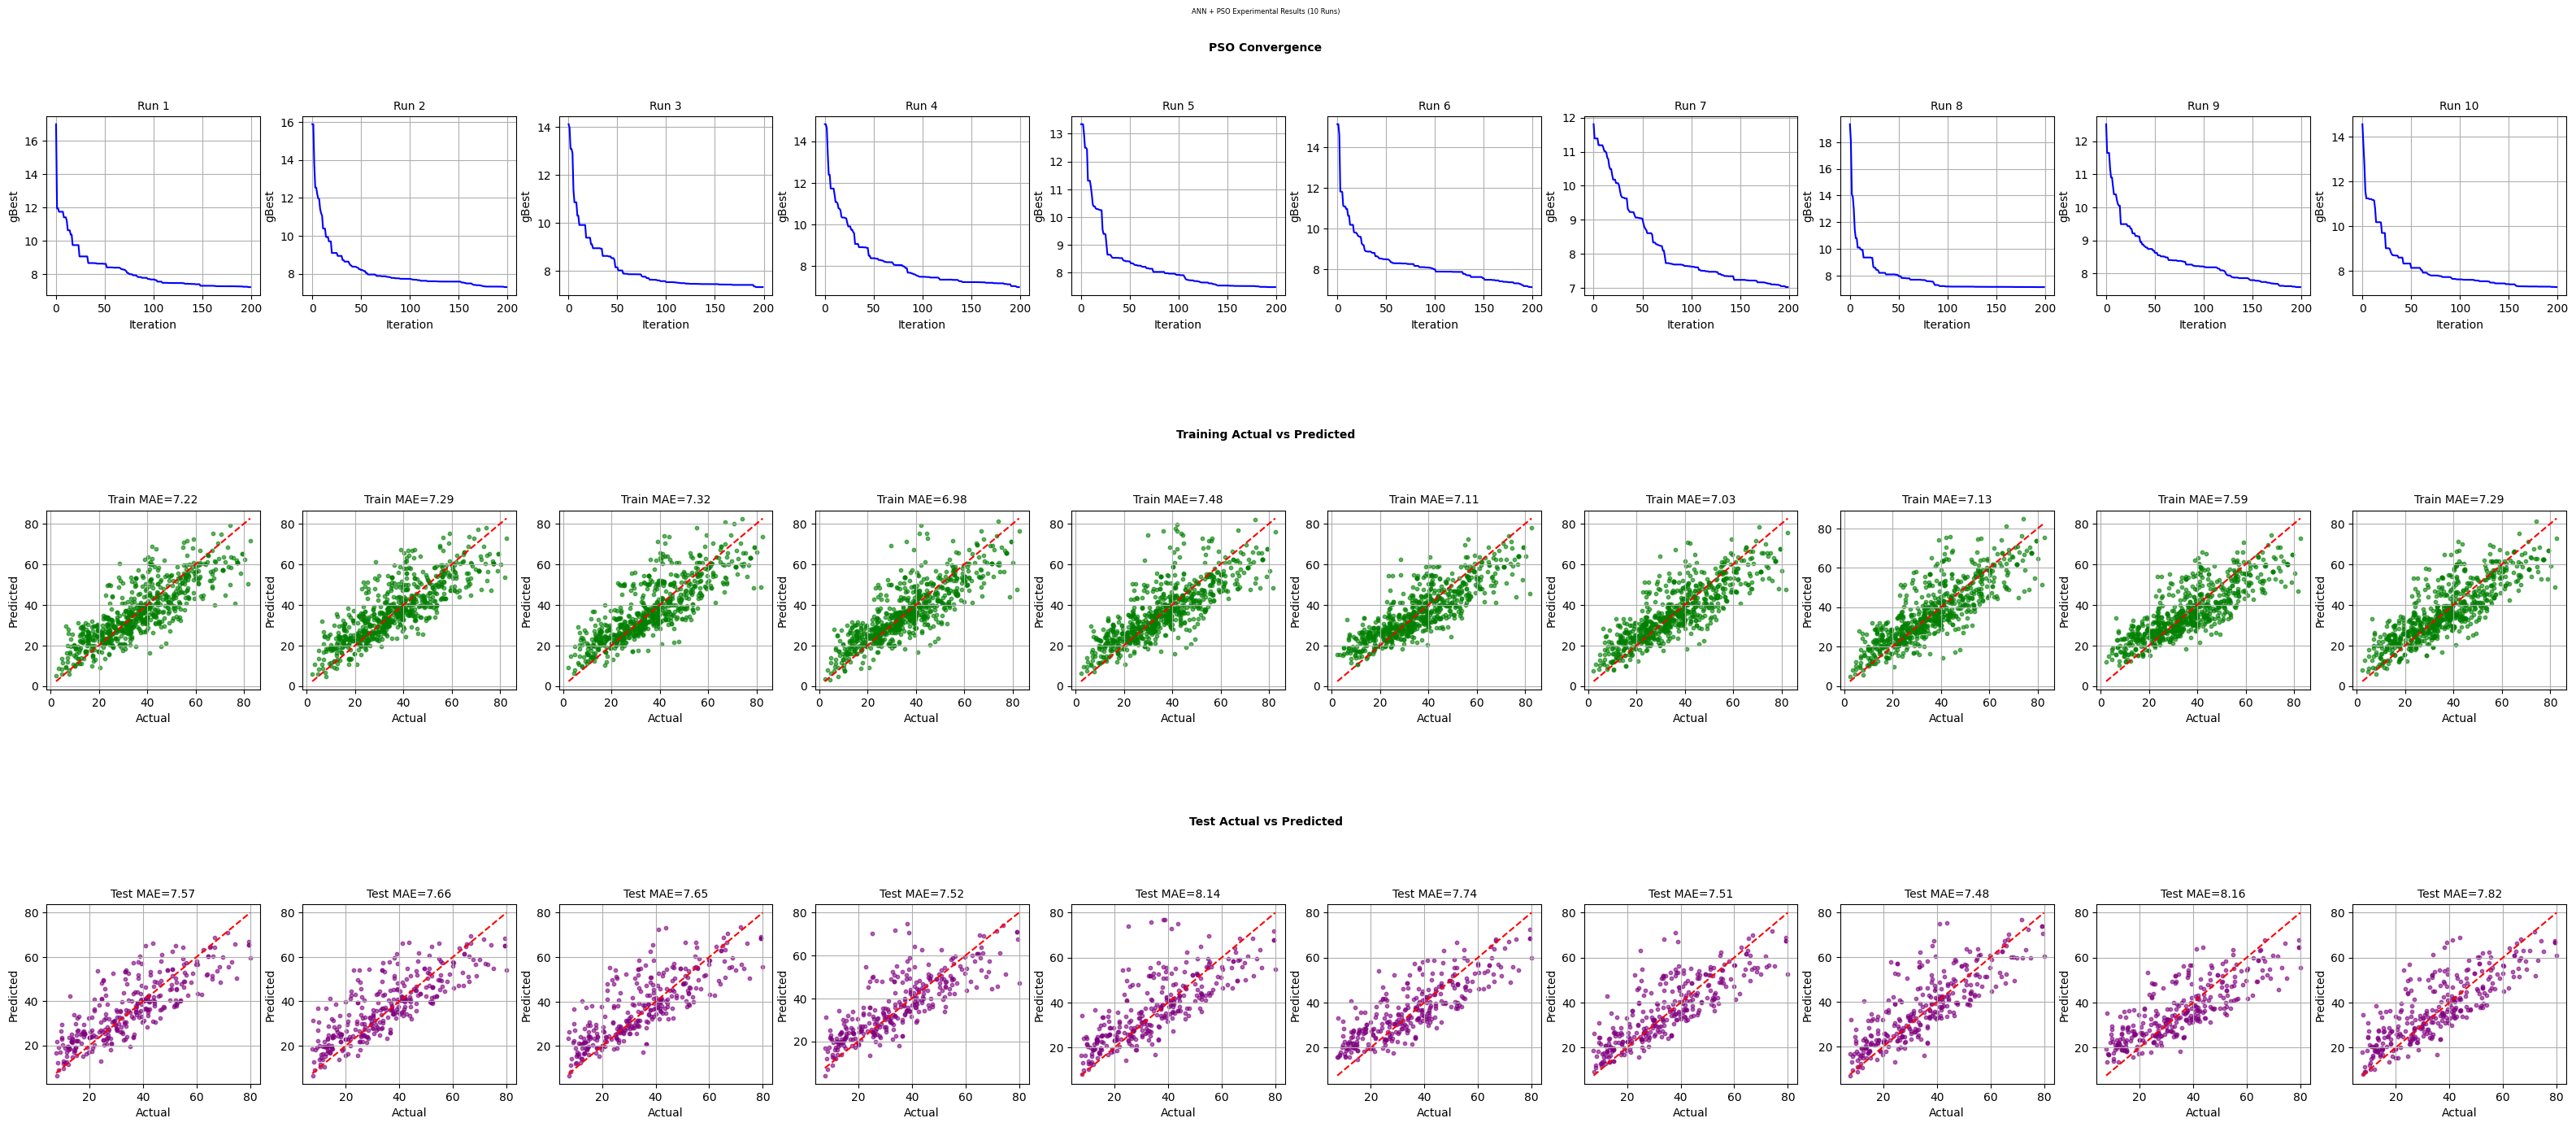


Generating averaged plots across runs...


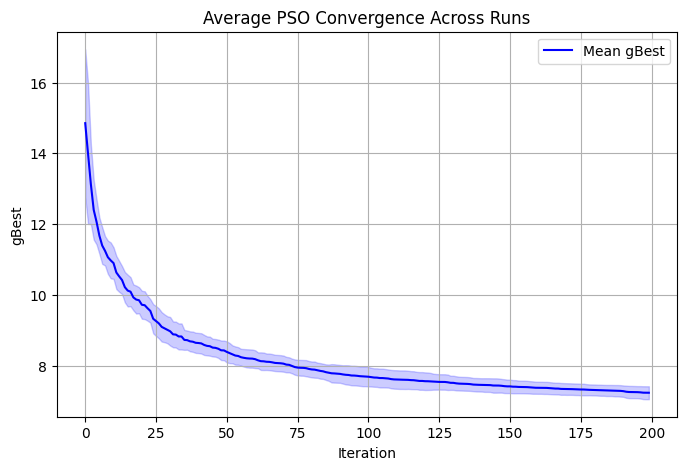

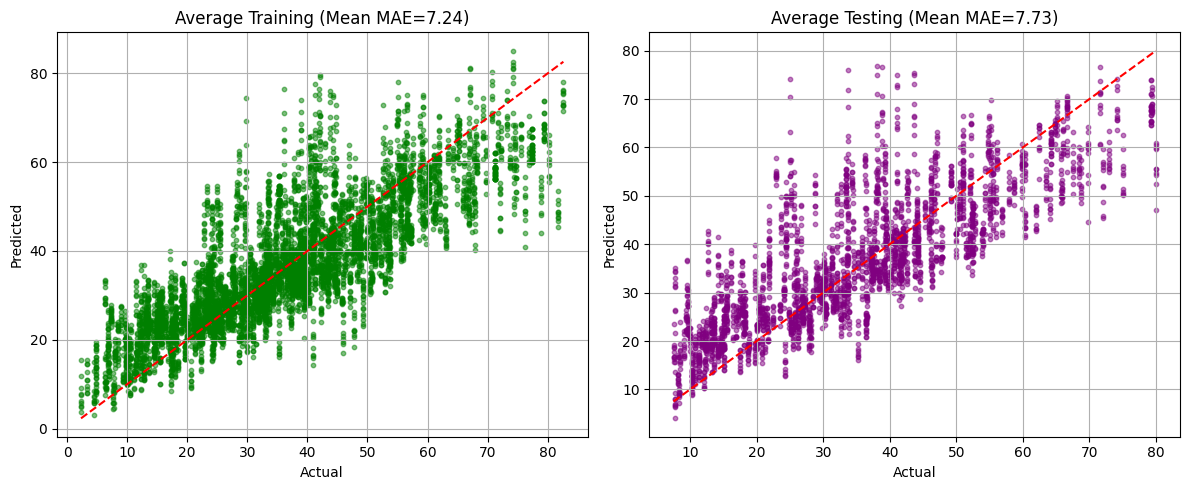

visualization completed.


In [4]:
run_pipeline(ann_config, pso_config,runs=10)

#### **2. Boundary Mode - Invisible**

In [5]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="ring",        # <-- USE RING TOPOLOGY
    #ring_radius=1,
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-5.0, 5.0),
    k_informants=3, #not use in ring topology
    rewire_every=None,
    boundary_mode="invisible",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=14.825029
[PSO] iter 21/200 gbest=9.973646
[PSO] iter 41/200 gbest=9.086397
[PSO] iter 61/200 gbest=8.816935
[PSO] iter 81/200 gbest=8.702386
[PSO] iter 101/200 gbest=8.617003
[PSO] iter 121/200 gbest=8.490546
[PSO] iter 141/200 gbest=8.249442
[PSO] iter 161/200 gbest=8.156043
[PSO] iter 181/200 gbest=8.037801
[PSO] iter 200/200 gbest=7.961367
   gBest=7.9614 | Train MAE=7.9614 | Test MAE=8.6280

 Run 2/10
[PSO] iter 1/200 gbest=16.251189
[PSO] iter 21/200 gbest=8.917844
[PSO] iter 41/200 gbest=8.219374
[PSO] iter 61/200 gbest=8.085294
[PSO] iter 81/200 gbest=7.924243
[PSO] iter 101/200 gbest=7.882450
[PSO] iter 121/200 gbest=7.840788
[PSO] iter 141/200 gbest=7.706565
[PSO] iter 161/200 gbest=7.633598
[PSO] iter 181/200 gbest=7.582405
[PSO] iter 200/200 gbest=7.448765
   gBest=7.4488 | Train MAE=7.4488 | Test MAE=7.9724

 Run 3/10
[PSO] iter 1/200 gbest=12.378898
[PSO] iter 21/200 gbest=8.641116
[PSO] 

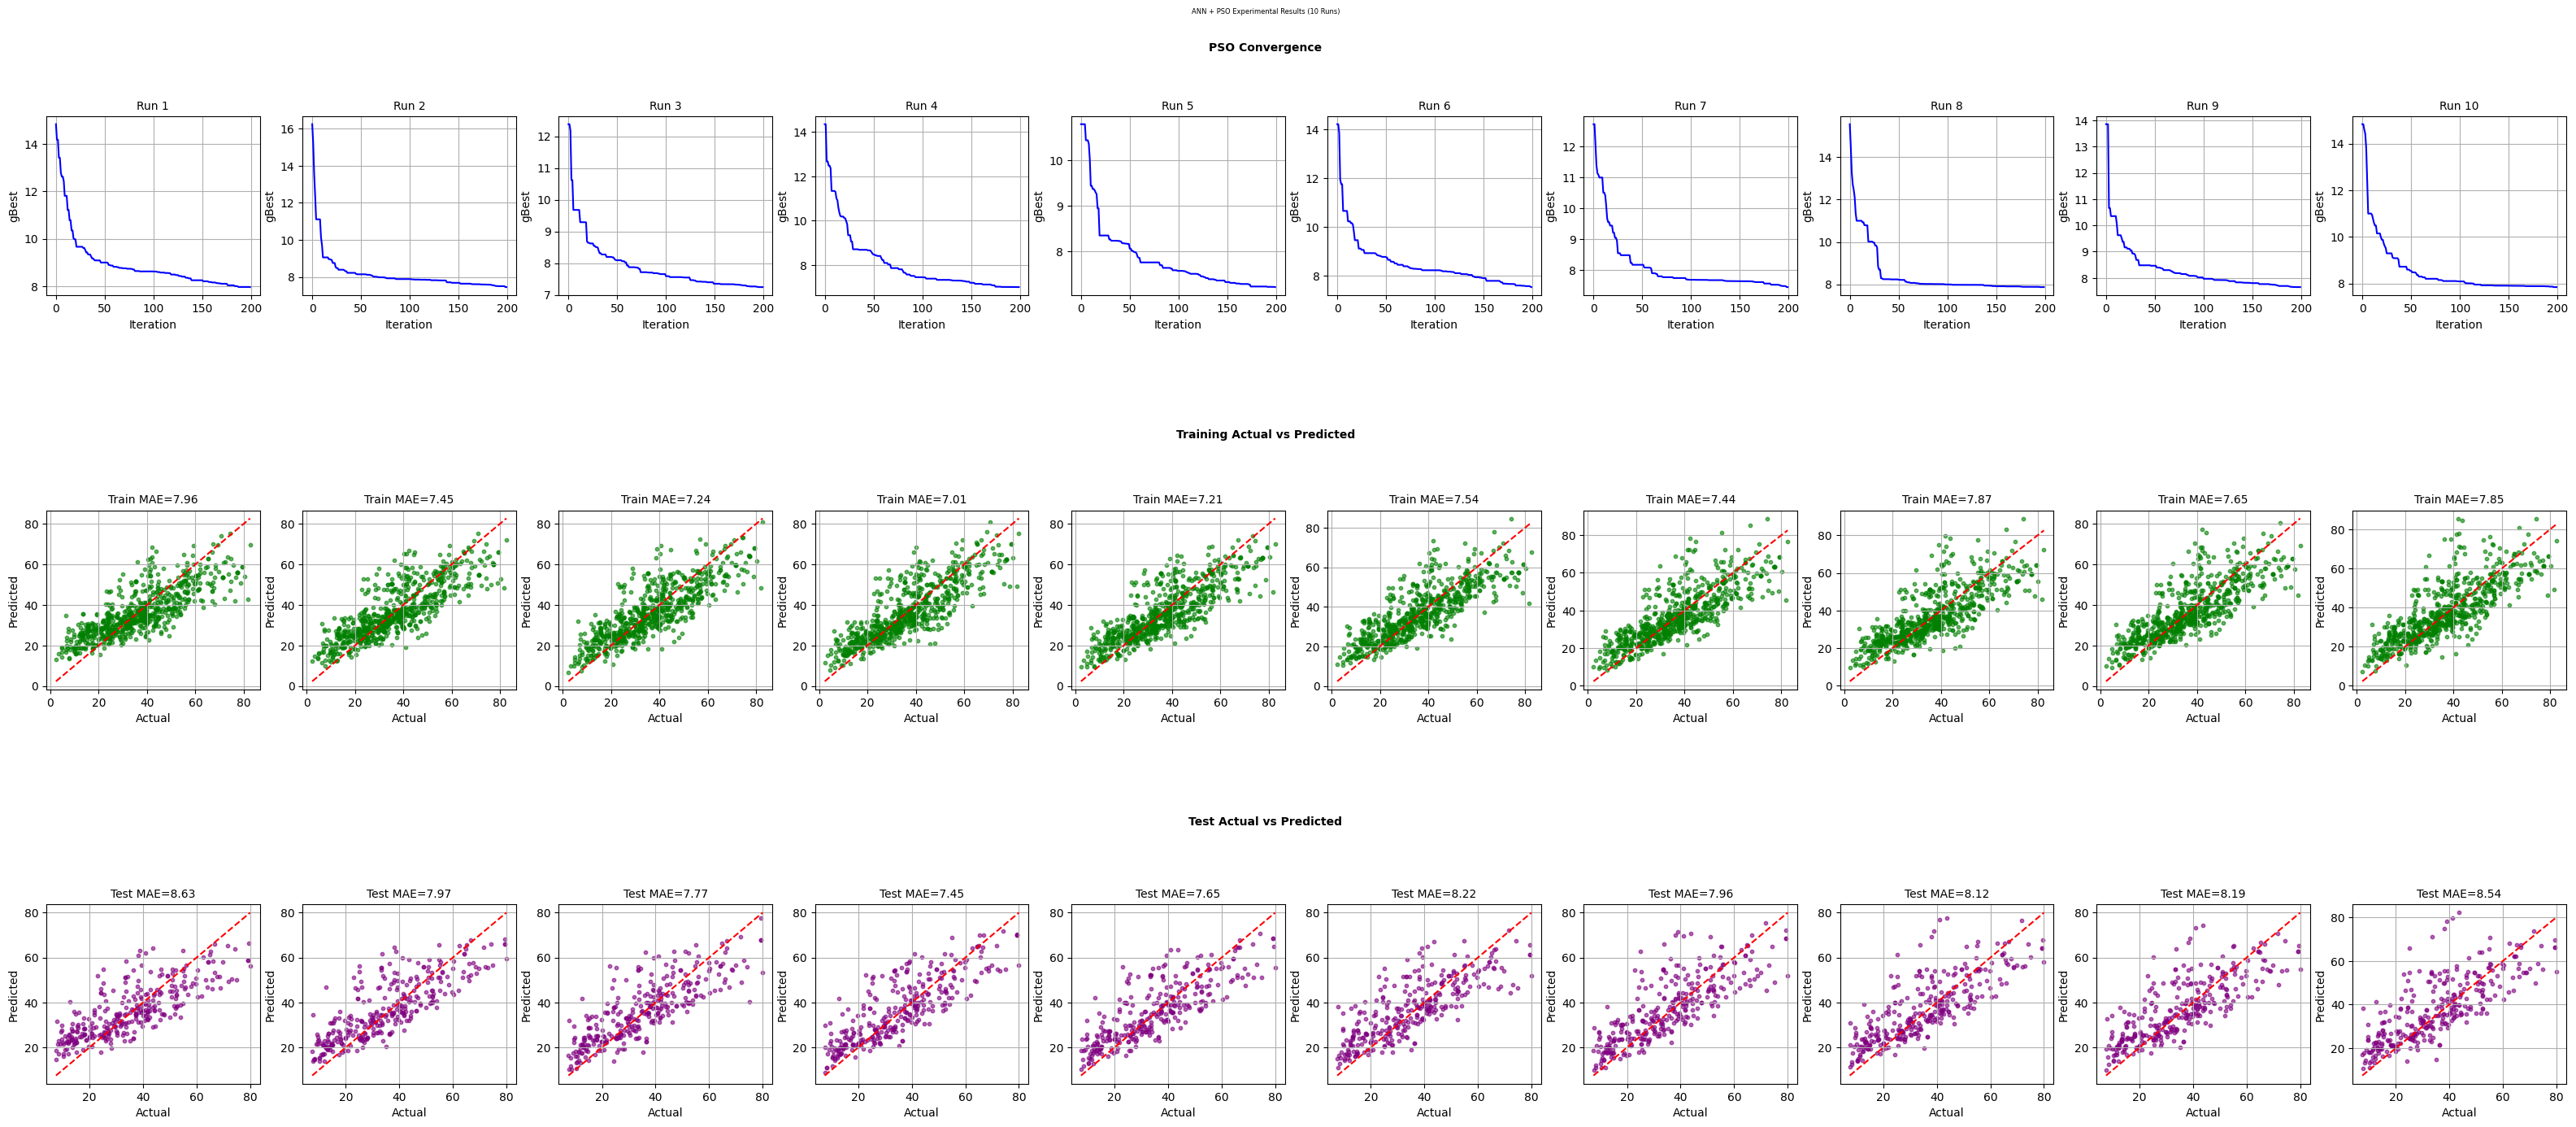


Generating averaged plots across runs...


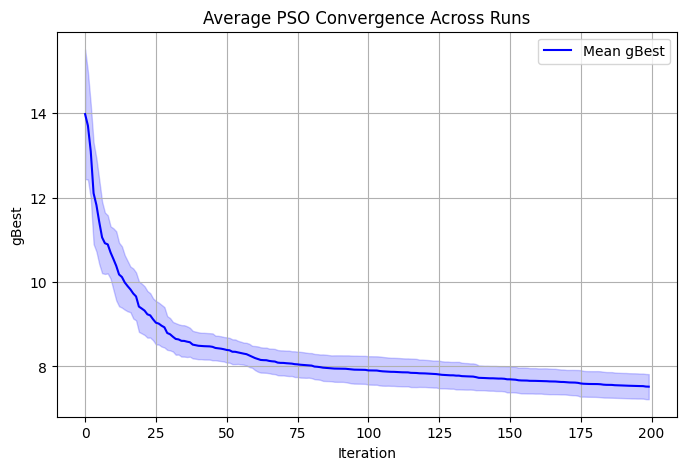

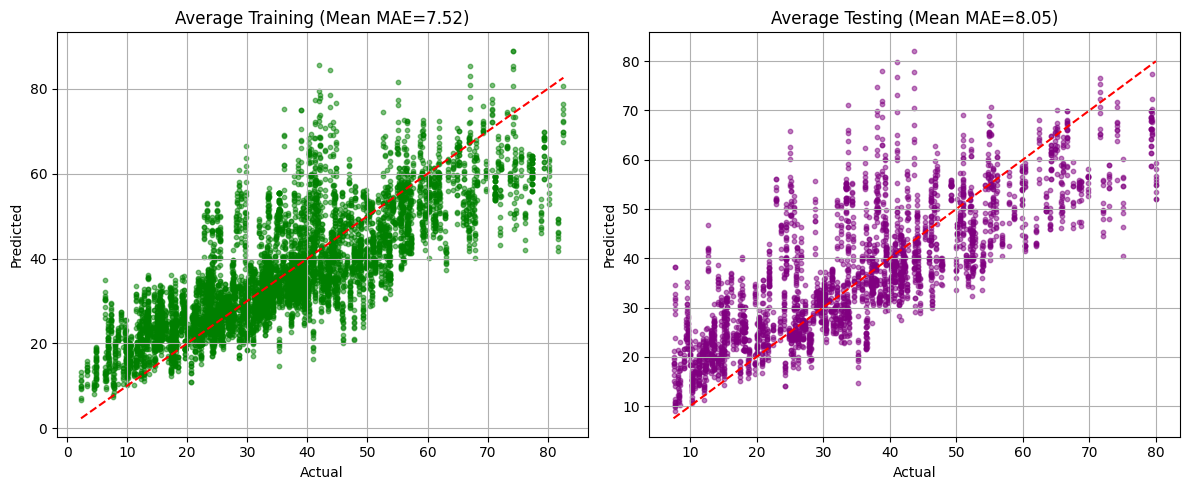

visualization completed.


In [6]:
run_pipeline(ann_config, pso_config,runs=10)

#### **3. Boundary Mode - reflect**

In [7]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    topology="reflect",
    swarm_size=40,
    iterations=200,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0,5.0),
    v_clamp=(-5.0, 5.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=None,
    minimize=True,
)


======== EXPERIMENTAL PIPELINE (10 RUNS) ========

 Run 1/10
[PSO] iter 1/200 gbest=14.806396
[PSO] iter 21/200 gbest=9.430507
[PSO] iter 41/200 gbest=9.039050
[PSO] iter 61/200 gbest=8.764160
[PSO] iter 81/200 gbest=8.477232
[PSO] iter 101/200 gbest=8.300939
[PSO] iter 121/200 gbest=8.038738
[PSO] iter 141/200 gbest=7.863948
[PSO] iter 161/200 gbest=7.661967
[PSO] iter 181/200 gbest=7.305513
[PSO] iter 200/200 gbest=7.160690
   gBest=7.1607 | Train MAE=7.1607 | Test MAE=7.6792

 Run 2/10
[PSO] iter 1/200 gbest=14.496035
[PSO] iter 21/200 gbest=9.728675
[PSO] iter 41/200 gbest=8.772289
[PSO] iter 61/200 gbest=8.336281
[PSO] iter 81/200 gbest=8.124689
[PSO] iter 101/200 gbest=7.998175
[PSO] iter 121/200 gbest=7.924431
[PSO] iter 141/200 gbest=7.853614
[PSO] iter 161/200 gbest=7.774538
[PSO] iter 181/200 gbest=7.722022
[PSO] iter 200/200 gbest=7.532755
   gBest=7.5328 | Train MAE=7.5328 | Test MAE=8.1205

 Run 3/10
[PSO] iter 1/200 gbest=15.663010
[PSO] iter 21/200 gbest=9.093423
[PSO] 

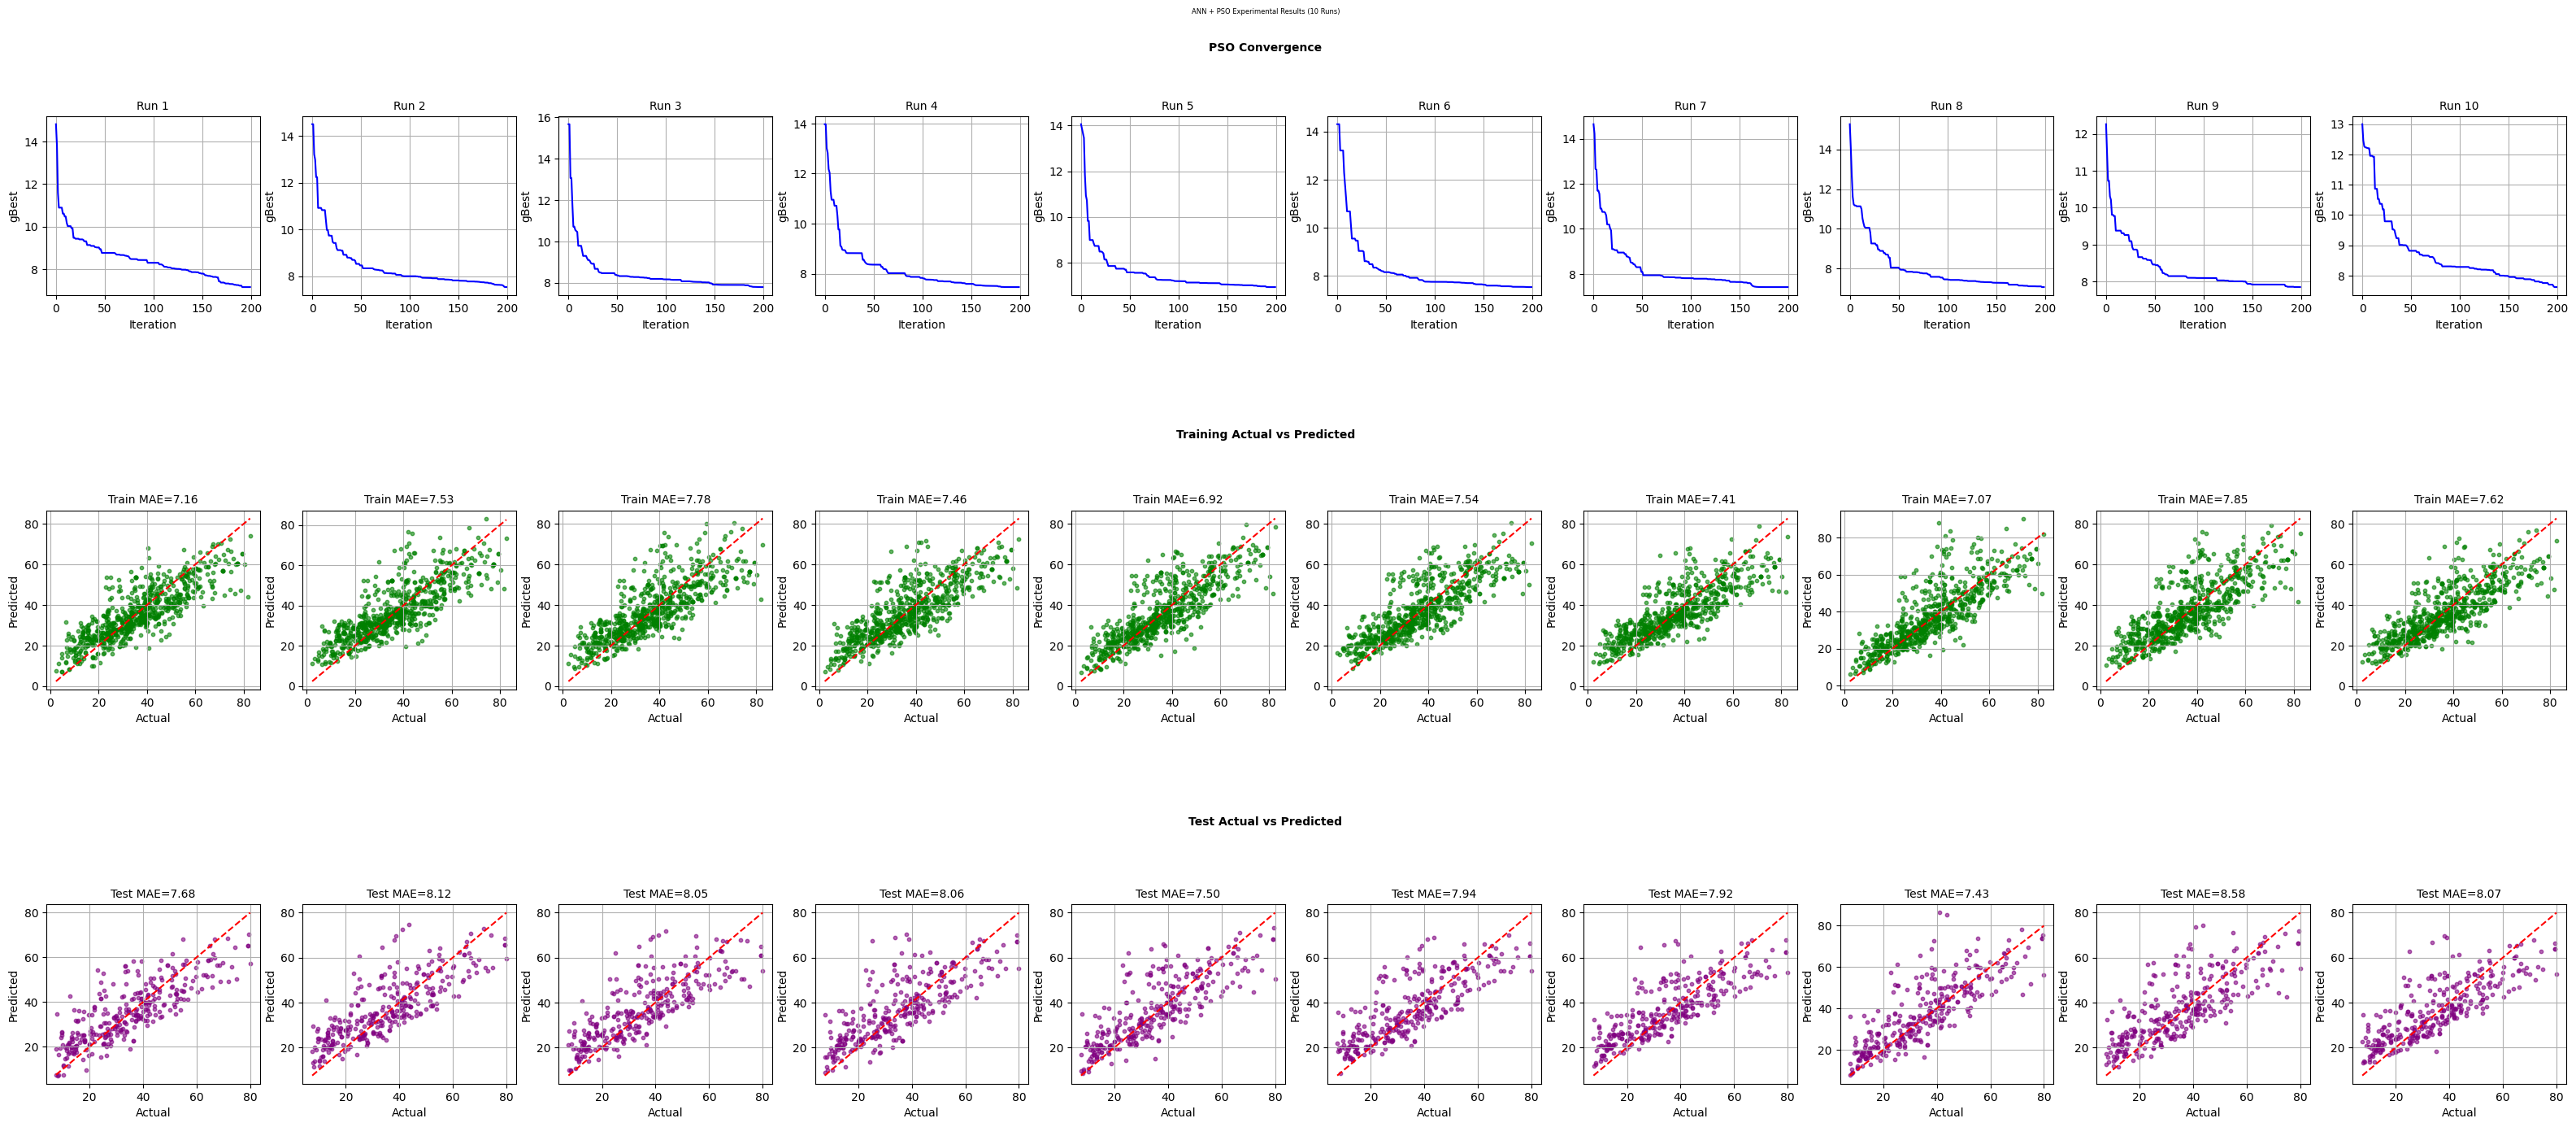


Generating averaged plots across runs...


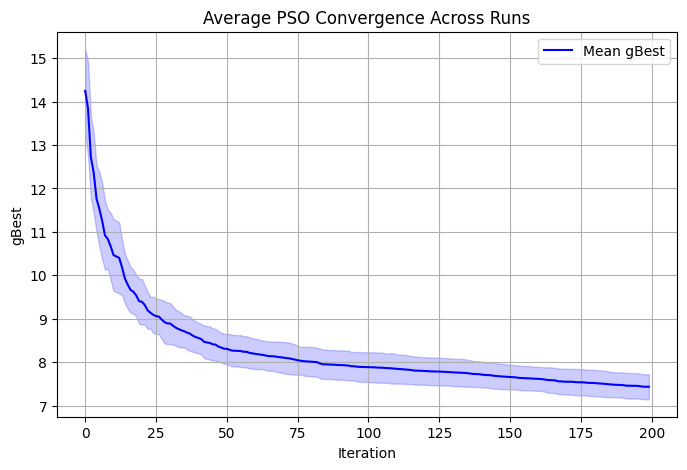

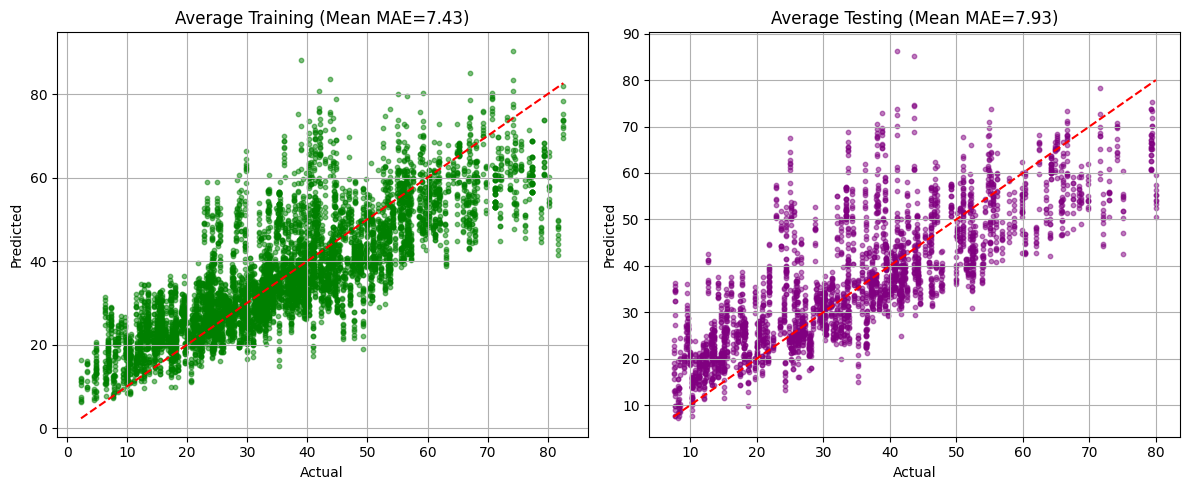

visualization completed.


In [8]:
run_pipeline(ann_config, pso_config,runs=10)

#### **Results & Discussion**

| **Boundary Mode** | **Average Train MAE** | **Average Train MAE (SD)** | **Average Test MAE** | **Average Test MAE (SD)** | **Performance Summary**                                        |
| ----------------- | --------------------- | -------------------------- | -------------------- | ------------------------- | -------------------------------------------------------------- |
| **Clip**          | **7.2436**            | ± 0.1828                   | **7.7264**           | ± 0.2365                  | Best performance; stable convergence; prevents overshoot       |
| **Invisible**     | 7.5222                | ± 0.2972                   | 8.0489               | ± 0.3519                  | Worst performance; lost evaluations reduce learning efficiency |
| **Reflex**        | 7.4345                | ± 0.2869                   | 7.9347               | ± 0.3161                  | Moderate performance; maintains diversity but less stable      |

Boundary modes define how PSO handles particles that move outside the permitted range. Different strategies control whether particles:bounce back,get clipped,or are temporarily ignored. We carried out experiments with following strategies:
clip-If a particle moves outside the boundary, its position is clipped to the nearest limit.
invisible-If a particle goes outside the boundary, the position is invalid, and the particle is treated as if it did not move.
reflex-If a particle hits the boundary, it bounces back like a mirror reflection.
Our experiments clearly indicates that clip gives the best optimized results with lowest MAE.Reflex has moderate performance and invisible gives worst results.These results align with PSO literature, which notes that clamping boundaries usually stabilise the optimisation process, while invisible boundaries reduce effective learning, and reflex boundaries offer balanced but sometimes less stable exploration.
